Image processing assignments

All the image processing assignments require to use the following dataset:

www.kaggle.com/datasets/ztaihong/weizmann-horse-database/data

The dataset contains in the horse directory 327 pictures of horses and in the mask directory where each image correspond to one image in the horse directory, and reports the corresponding manual segmentation of the horse.


Assignment 5
Perform image segmentation on all images in the dataset, using the normalized cut algorithm running on the top of superpixels rather than on raw pixels. For each image compute an accuracy metric (which one it is up to you to decide) measuring the overlap between the segments identified by NCUT and the ground truth horse semantic segmentation. Provide a table summarizing the average segmentation accuracy on all images, plus present 2 examples of images that are well-segmented (according to the above defined metric).

Hint: in Python, you have an NCut implementation in the scikit-image library; in Matlab, you can use the original NCut implementation here. Superpixels are implemented both in Matlab as well as in OpenCV. Feel free to pickup the implementation you liked most (and motivate the choice).

In [33]:
from skimage import segmentation, color, graph
from matplotlib import pyplot as plt
import numpy as np

from utils1 import *

To perform image segmentation using the normalized cut algorithm on superpixels rather than raw pixels, we first need to generate superpixels for each image. We can then apply the normalized cut algorithm to these superpixels. After segmentation, we'll compare the resulting segments with the ground truth horse semantic segmentation to compute an accuracy metric.

Here's a general outline of the steps:

Generate superpixels for each image.
Apply the normalized cut algorithm on the superpixels.
Compare the resulting segments with the ground truth horse semantic segmentation.
Compute an accuracy metric.
Summarize the average segmentation accuracy on all images.
For the accuracy metric, we can use Intersection over Union (IoU), also known as Jaccard Index. It measures the overlap between the predicted segmentation and the ground truth segmentation.


In [34]:

folder_path = '../datasets/weizmann_horse_db/horse'
images = load_images_from_folder(folder_path)

<Figure size 640x480 with 0 Axes>

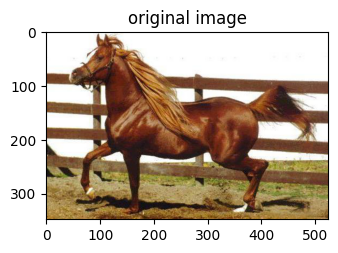

In [35]:
print_image(images[6], "original image")

# test superpixeling

skimage.segmentation.slic

Segments image using k-means clustering in Color-(x,y,z) space.

- image 2D, 3D or 4D ndarray
Input image, which can be 2D or 3D, and grayscale or multichannel (see channel_axis parameter). Input image must either be NaN-free or the NaN’s must be masked out

- n_segment sint, optional
The (approximate) number of labels in the segmented output image.

- compactness float, optional
Balances color proximity and space proximity. Higher values give more weight to space proximity, making superpixel shapes more square/cubic. In SLICO mode, this is the initial compactness. This parameter depends strongly on image contrast and on the shapes of objects in the image. We recommend exploring possible values on a log scale, e.g., 0.01, 0.1, 1, 10, 100, before refining around a chosen value.

<Figure size 640x480 with 0 Axes>

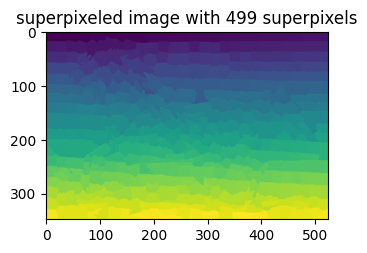

In [36]:
image = images[6]


num_superpixels = 499

# Apply SLIC algorithm to generate superpixels
labels = segmentation.slic(image, n_segments=num_superpixels, compactness=20, start_label=1)

print_image(labels, f'superpixeled image with {num_superpixels} superpixels')

In [38]:
# count the different values in the labels
unique, counts = np.unique(labels, return_counts=True)

print(f"number of superpixels: {len(unique)}")


number of superpixels: 454


skimage.color.label2rgb(label, image=None, colors=None, alpha=0.3, bg_label=0, bg_color=(0, 0, 0), image_alpha=1, kind='overlay', *, saturation=0, channel_axis=-1)[source]


Return an RGB image where color-coded labels are painted over the image.

Parameters:
- label ndarray
Integer array of labels with the same shape as image.

- image ndarray, optional
Image used as underlay for labels. It should have the same shape as labels, optionally with an additional RGB (channels) axis. If image is an RGB image, it is converted to grayscale before coloring.

- colors list, optional
List of colors. If the number of labels exceeds the number of colors, then the colors are cycled.

- alpha float [0, 1], optional
Opacity of colorized labels. Ignored if image is None.

- kind string, one of {‘overlay’, ‘avg’}
The kind of color image desired. ‘overlay’ cycles over defined colors and overlays the colored labels over the original image. ‘avg’ replaces each labeled segment with its average color, for a stained-class or pastel painting appearance.

<Figure size 640x480 with 0 Axes>

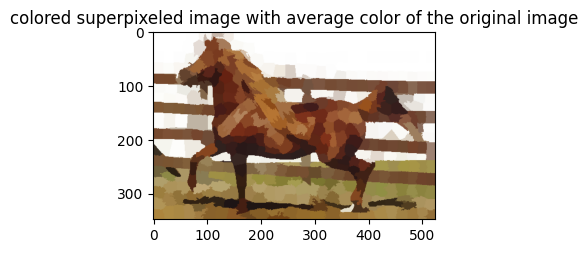

In [39]:
color_segment = color.label2rgb(labels, image, kind='avg')

print_image(color_segment, f'colored superpixeled image with average color of the original image')

In [40]:
# count the different values in the labels
uniquec, countsc = np.unique(color_segment, return_counts=True)

print(f"number of superpixels: {len(uniquec)}")


number of superpixels: 219


In [65]:
#print average color of the superpixels
average = np.average(color_segment)
average/2

69.65668688397531

skimage.graph.RAG

The Region Adjacency Graph (RAG) of an image, subclasses networx.Graph

Parameters:
- label_image : array of int
An initial segmentation, with each region labeled as a different integer. Every unique value in label_image will correspond to a node in the graph.

- connectivity : int in {1, …, label_image.ndim}, optional
The connectivity between pixels in label_image. For a 2D image, a connectivity of 1 corresponds to immediate neighbors up, down, left, and right, while a connectivity of 2 also includes diagonal neighbors. See scipy.ndimage.generate_binary_structure.

- data : networkx Graph specification, optional
Initial or additional edges to pass to the NetworkX Graph constructor. See networkx.Graph. Valid edge specifications include edge list (list of tuples), NumPy arrays, and SciPy sparse matrices.

In [66]:
RAG_distance = graph.rag_mean_color(image, labels, mode='distance')
print(RAG_distance)
print(f'image shape: {image.shape}')
RAG_similarity = graph.rag_mean_color(image, labels, mode='similarity', sigma=average)
print(RAG_similarity)


RAG with 454 nodes and 1311 edges
image shape: (348, 524, 3)
RAG with 454 nodes and 1311 edges


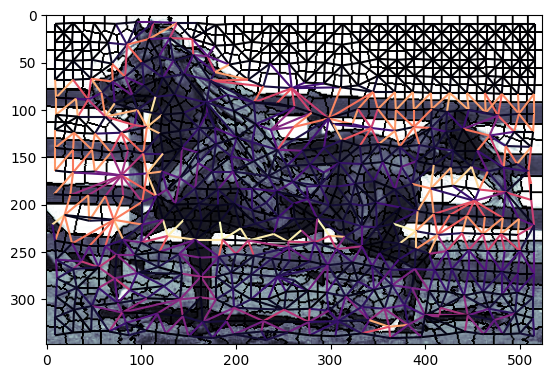

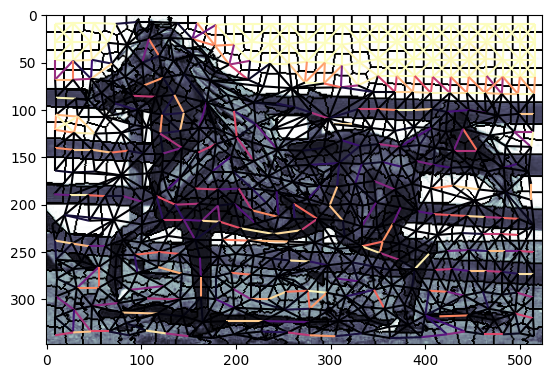

In [67]:
graph1 = graph.show_rag(labels=labels, rag=RAG_distance, image=image)
graph2 = graph.show_rag(labels=labels, rag=RAG_similarity, image=image)

In [17]:
#print the values of the RAG edges


#print(RAG_similarity.edges.data())


In [68]:
ncut = graph.cut_normalized(labels, rag=RAG_similarity)
print(ncut.shape)

(348, 524)


In [69]:
color_ncut = color.label2rgb(ncut, image, kind='avg', bg_label=0)

In [45]:
# check if values is ncut are all equal
"""for i in range(ncut.shape[0]):
    for j in range(ncut.shape[1]):
        if ncut[i][j] != 1:
            print(f'test')
            break"""

"for i in range(ncut.shape[0]):\n    for j in range(ncut.shape[1]):\n        if ncut[i][j] != 1:\n            print(f'test')\n            break"

<Figure size 640x480 with 0 Axes>

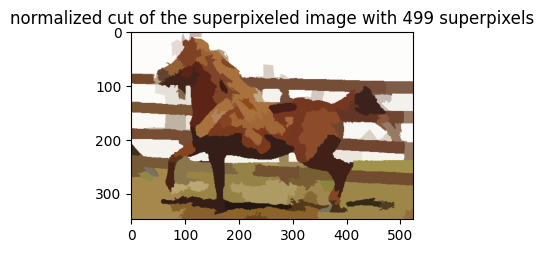

In [70]:
print_image(color_ncut, f'normalized cut of the superpixeled image with {num_superpixels} superpixels')




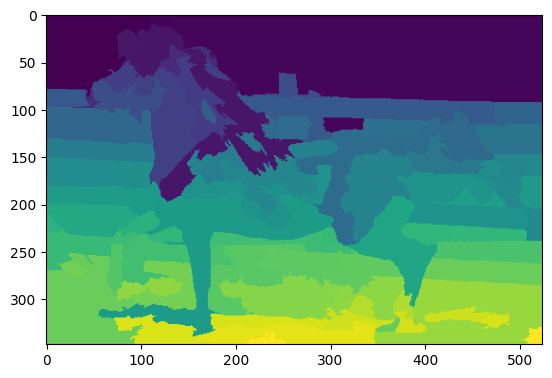

In [71]:
np.unique(ncut)
# print the mask with 0 as black and 1 as white
plt.imshow(ncut)
plt.show()

In [72]:
#find the max og ncut
print(np.min(ncut))

1


In [75]:
#print average color of the superpixels
average = np.average(color_segment)
average


139.31337376795062

<Figure size 640x480 with 0 Axes>

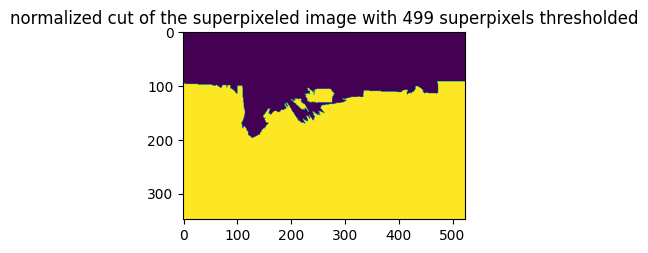

In [76]:
#threshold ncut
ncut_threshold = ncut.copy()
ncut_threshold[ncut_threshold < average] = 0
ncut_threshold[ncut_threshold >= average] = 1
print_image(ncut_threshold, f'normalized cut of the superpixeled image with {num_superpixels} superpixels thresholded')

In [17]:
"""image = images[0]
img = image

labels1 = segmentation.slic(img, compactness=30, n_segments=400,
                            start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(out1)
plt.title('segmented image')"""

"image = images[0]\nimg = image\n\nlabels1 = segmentation.slic(img, compactness=30, n_segments=400,\n                            start_label=1)\nout1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)\n\ng = graph.rag_mean_color(img, labels1, mode='similarity')\nlabels2 = graph.cut_normalized(labels1, g)\nout2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)\n\nfig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))\n\nax[0].imshow(out1)\nax[1].imshow(out2)\n\nfor a in ax:\n    a.axis('off')\n\nplt.tight_layout()\n\nplt.figure(figsize=(8, 4))\nplt.subplot(1, 2, 1)\nplt.imshow(out1)\nplt.title('segmented image')"

In [18]:
from utils1 import load_images_from_folder
folder_path = '..\\datasets\\weizmann_horse_db\\mask'
imagess = load_images_from_folder(folder_path)

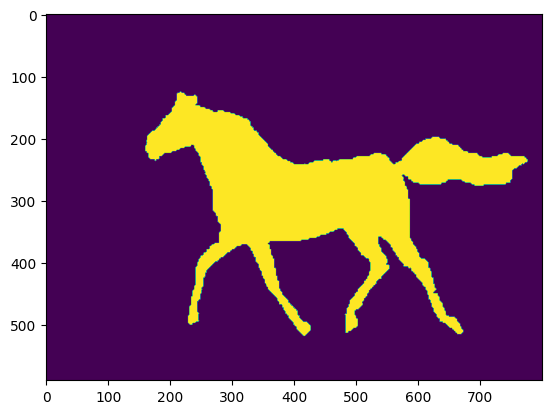

In [19]:
# check if all pixels are the same color in the mask


import numpy as np
np.unique(imagess[0])
# print the mask with 0 as black and 1 as white
plt.imshow(imagess[0])
plt.show()



In [20]:
from sklearn.metrics import jaccard_score

img_true=np.array(imagess[0]).ravel()
img_pred=np.array(ncut_threshold).ravel()
iou = jaccard_score(img_true, img_pred)

In [21]:
iou

0.6821661726464331

# Wrapping up

In [22]:
def ncut(image):
    labels = segmentation.slic(image, n_segments=500, compactness=20, start_label=1)
    RAG_similarity = graph.rag_mean_color(image, labels, mode='similarity')
    ncut_ = graph.cut_normalized(labels, rag=RAG_similarity)
    ncut_threshold = ncut_.copy()
    average = np.average(ncut_)/2
    ncut_threshold[ncut_threshold < average] = 0
    ncut_threshold[ncut_threshold >= average] = 1
    return ncut_threshold


In [24]:
def metric(image, mask):
    ncut_threshold = ncut(image)
    img_true=np.array(mask).ravel()
    img_pred=np.array(ncut_threshold).ravel()
    iou = jaccard_score(img_true, img_pred)
    return iou

In [26]:
from tqdm import tqdm

accs = []

with tqdm(total=len(images), desc="image", colour='yellow') as pbar:
    for i in range(len(images)):
        accs.append(metric(images[i], imagess[i]))
        pbar.update(1)

image:   0%|          | 0/327 [00:00<?, ?it/s]

image: 100%|██████████| 327/327 [47:54<00:00,  8.79s/it]  


In [27]:
accs2 = accs.copy()

In [34]:
accs2[-10:]

[0.5409798359273174,
 0.551352712048544,
 0.5767047303323903,
 0.6292913280155674,
 0.6578375935540051,
 0.7307805825242718,
 0.7564695328134704,
 0.7634230087159944,
 0.810859647419863,
 0.9171052631578948]

# number 109 is the winner !!!
## 180 second one !!

147 is the loser......

In [35]:
np.mean(accs2)

0.25701426898639973

In [43]:
#export accs in a csv file with a new

import csv
with open('accs.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in accs:
        writer.writerow([i])


